<a href="https://colab.research.google.com/github/Nyubk/PPv6/blob/main/ml_kmeans_ppv6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://edu.rcastellanos.cdmx.gob.mx/sitio_lad/images/Imagotipo_compacto_color_600px.png width= 300>


##ML K-means - Proyecto Prototipico LCDN 601 2024-2

In [ ]:
#Importar modulos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [23]:
# Cargar el archivo CSV
ds_ppv6_ = pd.read_csv('https://github.com/Nyubk/PPv6/raw/refs/heads/main/CNPV2000_2020/dataset_cluster.csv')

In [24]:
#Copia de seguridad
ds_ppv6 = ds_ppv6_
ds_ppv6.head()

,ANIO,CDMX_ECO_ACT,CDMX_ECO_NOACT,EDOMEX_ECO_ACT,EDOMEX_ECO_NOACT,PRECIP_CDMX,PRECIP_EDOMEX,TEMP_CDMX,TEMP_EDOMEX
0,2000,3625363.0,2986038.0,4524229.0,4511100.0,23.12,22.200000,15.8,14.0
1,2010,3821655.0,193497.0,5809330.0,310223.0,58.16,67.475000,17.2,14.2
2,2020,5082152.0,2770430.0,8522151.0,5138894.0,39.15,63.233333,18.3,15.1


In [25]:
# Generamos una matriz de correlacion para identificar los campos relacionados
correlation_matrix = ds_ppv6.corr()
correlation_matrix

,ANIO,CDMX_ECO_ACT,CDMX_ECO_NOACT,EDOMEX_ECO_ACT,EDOMEX_ECO_NOACT,PRECIP_CDMX,PRECIP_EDOMEX,TEMP_CDMX,TEMP_EDOMEX
ANIO,1.000000,0.921401,-0.069382,0.979399,0.119560,0.456927,0.820497,0.997609,0.938652
CDMX_ECO_ACT,0.921401,1.000000,0.323748,0.980894,0.495988,0.075340,0.533856,0.892338,0.998894
CDMX_ECO_NOACT,-0.069382,0.323748,1.000000,0.133494,0.982139,-0.919063,-0.627201,-0.138166,0.278909
EDOMEX_ECO_ACT,0.979399,0.980894,0.133494,1.000000,0.317582,0.267893,0.688159,0.963100,0.988955
EDOMEX_ECO_NOACT,0.119560,0.495988,0.982139,0.317582,1.000000,-0.828494,-0.469452,0.050653,0.454617
PRECIP_CDMX,0.456927,0.075340,-0.919063,0.267893,-0.828494,1.000000,0.883393,0.517313,0.122136
PRECIP_EDOMEX,0.820497,0.533856,-0.627201,0.688159,-0.469452,0.883393,1.000000,0.858045,0.573019
TEMP_CDMX,0.997609,0.892338,-0.138166,0.963100,0.050653,0.517313,0.858045,1.000000,0.912572
TEMP_EDOMEX,0.938652,0.998894,0.278909,0.988955,0.454617,0.122136,0.573019,0.912572,1.000000


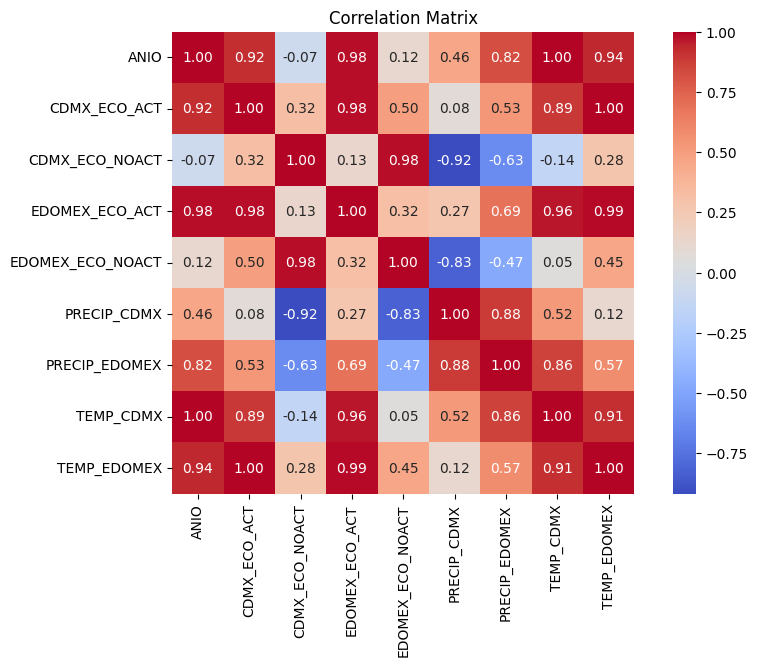

In [26]:
# Generamos un mapa de calor para tener una visulizacion grafica de la correlacion e identificar mas facilmente las relaciones entre los campos
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)


plt.title('Correlation Matrix') #Añadir titulo
plt.show()

In [42]:
#Escogemos los campos con mayor correlacion
#Se agrega la PRECIP_CDMX ya que es uno de los factores donde se ve reflejada las afectaciones climáticas a pesar de no guardar una alta correlación
X = np.array(ds_ppv6[["ANIO","CDMX_ECO_ACT","EDOMEX_ECO_ACT","PRECIP_CDMX","TEMP_CDMX"]].values)
X

array([[2.000000e+03, 3.625363e+06, 4.524229e+06, 2.312000e+01,
        1.580000e+01],
       [2.010000e+03, 3.821655e+06, 5.809330e+06, 5.816000e+01,
        1.720000e+01],
       [2.020000e+03, 5.082152e+06, 8.522151e+06, 3.915000e+01,
        1.830000e+01]])

In [44]:
#Entrenamos el modelo
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [57]:
# Centro de los clusters
print("Centroides de los clusters:", kmeans.cluster_centers_)

# Etiquetas de los clusters asignados a cada punto
print("Etiquetas de clusters:", kmeans.labels_)

Centroides de los clusters: [[2.010000e+03 3.821655e+06 5.809330e+06 5.816000e+01 1.720000e+01]
 [2.020000e+03 5.082152e+06 8.522151e+06 3.915000e+01 1.830000e+01]
 [2.000000e+03 3.625363e+06 4.524229e+06 2.312000e+01 1.580000e+01]]
Etiquetas de clusters: [2 0 1]


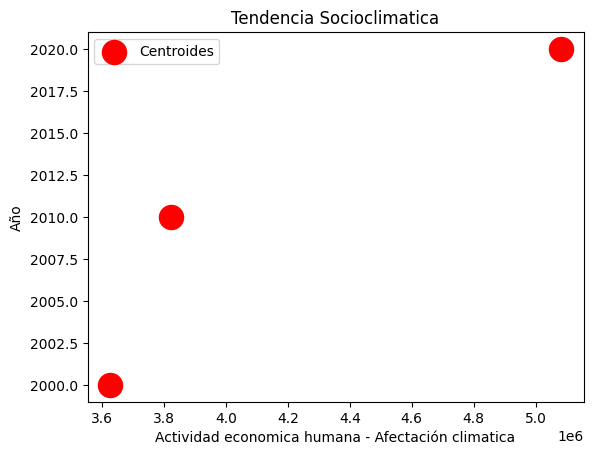

In [62]:
# Creamos un gráfico de dispersión de los datos y dibujamos los centroides
plt.scatter(X[:,1], X[:,0], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red', label='Centroides')
plt.legend()
plt.title("Tendencia Socioclimatica")
plt.xlabel("Actividad economica humana - Afectación climatica")
plt.ylabel("Año")
plt.show()